# 04. Self Oil Station Price Analysis

# BeautifulSoup만으로 해결할 수 없는 것
    - 접근할 웹 주소를 알 수 없을 때
    - 자바스크립트를 사용하는 웹페이지의 경우
    - 웹브라우저로 접근하지 않으면 안될 때
# Selenium
    - 웹 브라우저를 원격으로 조작하는 도구
    - 자동으로 URL을 열고 클릭 등이 가능
    - 스크롤, 문자의 입력, 화면 캡처 등등
- python 모듈 설치 > 크롬드라이버를 설치해야 함


## 1. 셀레니움 설치
- 윈도우, mac(intel)
    - conda install selenium
- mac(m1)
    - pip install seleenium
- 크롬드라이버 설치
    - 도움말 > 크롬 버전확인
    - chrome driver download 검색 후 , 버전에 맞는 버전 다운로드
    - chromedriver > ds_dstudy/driver 폴더에 저장

In [ ]:
#!pip install selenium
#!pip list | grep sele

In [ ]:
from selenium import webdriver

In [6]:
driver = webdriver.Chrome("../driver/chromedriver.exe") #mac은 .exe 생략
#driver.get("https://www.nave.com") # 새로운 웹브라우저 실행
driver.quit()

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. Selenium으로 접근

In [11]:
from selenium import webdriver

In [12]:
# 페이지 접근
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
## 지역별 창을 원하는데 > 메인페이지가 나옴
driver.get(url)
# 한번더 요청해야 지역별 창으로 접속
driver.get(url)

- 문제점
    - 1. 해당 URL로 한 번에 접근이 안됩니다.
    - 2. 메인페이지로 접속이 되고, 팝업창이 하나 나옵니다.

In [9]:
import time

def mainpage_get():
    # 페이지 접근
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome("../driver/chromedriver.exe")
    driver.get(url)

    time.sleep(3)

    # 팝업창으로 화면 전환
    driver.switch_to_window(driver.window_handles[-1])
    ## 팝업창 닫아주기
    driver.close()

    time.sleep(3)
    # 메인화면 창으로 전환
    driver.switch_to_window(driver.window_handles[-1])
    ## 접근 URL 다시 요청
    driver.get(url)
mainpage_get()

C:\Users\82103\AppData\Local\Temp/ipykernel_64992/2310349290.py:12: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])
C:\Users\82103\AppData\Local\Temp/ipykernel_64992/2310349290.py:18: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


---

In [14]:
# 지역: 시/도 
sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n              경기\n             \n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [15]:
sido_list = sido_list_raw.find_elements_by_tag_name("option") # len = 18
#value(서울특별시) 와 text(서울)가 다르니까
sido_list[1].text , sido_list[1].get_attribute("value")


('서울', '서울특별시')

In [16]:
sido_names = []
for option in sido_list:
    sido_names.append(option.get_attribute("value"))
#동일코드
#sido_names = [option.get_attribute("value") for option in sido_list]
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [17]:
sido_names[0]

'서울특별시'

In [18]:
sido_list_raw.send_keys(sido_names[0]) #16이면 제주 선택

In [19]:
# 구
## 서울로 선택되어 있을때...
gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0") #부모 태그
gu_list = gu_list_raw.find_elements_by_tag_name("option") #자식 태그

gu_names = [option.get_attribute("value") for option in gu_list]
#gu_names
gu_names = gu_names[1:]
gu_names[:5] , len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [20]:
gu_list_raw.send_keys(gu_names[15])

In [22]:
# 엑셀 저장 I
driver.find_element_by_css_selector("#glopopd_excel").click()

In [23]:
# 엑셀 저장 II
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [ ]:
element_get_excel = driver.find_elements_by_id("glopopd_excel")
element_get_excel.click()

In [25]:
conda install -c conda-forge tqdm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\82103\anaconda3\envs\ds_study

  added / updated specs:
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tqdm-4.62.3                |     pyhd8ed1ab_0          80 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          80 KB

The following NEW packages will be INSTALLED:

  tqdm               conda-forge/noarch::tqdm-4.62.3-pyhd8ed1ab_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.7.5-h~ --> conda-forge::ca-certificates-2021.5.30-h5b45459_0
  certifi            pkgs/main::certifi-2021.5.30-py38haa9~ --> conda-forge::certifi-2021.5.30-py38haa244fe_0
  openssl              pkgs/main::openssl-1.1.1l-h2bbff1b_0 --> conda-for

In [28]:
# 자동화

import time
from tqdm import tqdm_notebook #얼마나 진행중인지 눈으로 확인하기 위해서...

for gu in tqdm_notebook(gu_names) :
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)

    time.sleep(2)

    element_get_excel = driver.find_element_by_id("glopopd_excel").click()
    time.sleep(2)

C:\Users\82103\AppData\Local\Temp/ipykernel_64992/2136067563.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names) :


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
driver.close()

---

# 4. 다운받은 구별 데이터 전처리

In [58]:
import pandas as pd
from glob import glob
# 파일 목록을 한 번에 가져올 수 있다.

In [59]:
# 파일 목록 한번에 가져오기
glob("../data/지역_*.xls")

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls']

In [60]:
# 파일명 저장
# 파일의 목록을 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [61]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2) # 0,1행은 내용이 없기 때문에 header=2
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
13,서울특별시,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),현대오일뱅크,02-493-0115,Y,1889,1698,1498,-
14,서울특별시,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,GS칼텍스,02-494-0400,Y,-,-,-,-


In [62]:
tmp_raw = [] # 모든 데이터 담기

for file_name in stations_files :
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [63]:
#concat 구조가 동일한 데이터를 한번에 엮기
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,면목SELF주유소,서울 중랑구 동일로 627 (면목동),SK에너지,02-437-4072,Y,-,1625,1405,-
1,서울특별시,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),현대오일뱅크,02-434-1448,N,-,1625,1405,950
2,서울특별시,대양주유소,서울 중랑구 봉우재로 105 (상봉동),GS칼텍스,02-437-5457,Y,1845,1625,1405,1000
3,서울특별시,오천만주유소,서울 중랑구 동일로 547 (면목동),S-OIL,070-7797-7474,Y,-,1627,1407,-
4,서울특별시,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),S-OIL,02-2207-9419,N,-,1635,1435,1050
...,...,...,...,...,...,...,...,...,...,...
6,서울특별시,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,GS칼텍스,02-896-5145,Y,1835,1669,1459,1000
7,서울특별시,현대오일뱅크(주)직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),현대오일뱅크,02-891-5189,Y,1865,1675,1465,-
8,서울특별시,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),현대오일뱅크,02-859-5426,N,-,1689,1489,-
9,서울특별시,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,SK에너지,02-861-2241,N,-,1713,1503,-


In [39]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [40]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [41]:
stations = pd.DataFrame({
    "상호" : stations_raw["상호"],
    "주소" : stations_raw["주소"],
    "가격" : stations_raw["휘발유"],
    "셀프" : stations_raw["셀프여부"],
    "상표" : stations_raw["상표"],    
})
stations.tail()

,상호,주소,가격,셀프,상표
6,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1669,Y,GS칼텍스
7,현대오일뱅크(주)직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1675,Y,현대오일뱅크
8,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1689,N,현대오일뱅크
9,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1713,N,SK에너지
10,SK에너지(주) 박미주유소,서울 금천구 시흥대로 39-7 (시흥동),1718,N,SK에너지


In [48]:
# 주소보고 어느 구에 속하는지
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]
# stations.head(3)
stations["구"].unique(), len(stations["구"].unique())  

(array(['중랑구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
        '성북구', '송파구', '강남구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구',
        '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구'], dtype=object),
 25)

In [49]:
stations.head()

,상호,주소,가격,셀프,상표,구
0,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1625,Y,SK에너지,중랑구
1,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1625,N,현대오일뱅크,중랑구
2,대양주유소,서울 중랑구 봉우재로 105 (상봉동),1625,Y,GS칼텍스,중랑구
3,오천만주유소,서울 중랑구 동일로 547 (면목동),1627,Y,S-OIL,중랑구
4,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1635,N,S-OIL,중랑구


In [ ]:
# 가격 데이터형 변환 object -> float
## astype
stations["가격"] = stations["가격"].astype("float")
# 가격정보 없는 주유소 때문에 error

In [50]:
# 가격 정보 없는 주유소
stations[stations["가격"]=="-"]
# 삭제 >> 가격정보 있는 주유소만 사용
stations = stations[stations["가격"]!="-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
6,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1669,Y,GS칼텍스,금천구
7,현대오일뱅크(주)직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1675,Y,현대오일뱅크,금천구
8,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1689,N,현대오일뱅크,금천구
9,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1713,N,SK에너지,금천구
10,SK에너지(주) 박미주유소,서울 금천구 시흥대로 39-7 (시흥동),1718,N,SK에너지,금천구


In [51]:
stations["가격"] = stations["가격"].astype("float")

In [52]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      468 non-null    object 
 1   주소      468 non-null    object 
 2   가격      468 non-null    float64
 3   셀프      468 non-null    object 
 4   상표      468 non-null    object 
 5   구       468 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.6+ KB


In [55]:
stations

,index,상호,주소,가격,셀프,상표,구
0,0,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1625.0,Y,SK에너지,중랑구
1,1,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1625.0,N,현대오일뱅크,중랑구
2,2,대양주유소,서울 중랑구 봉우재로 105 (상봉동),1625.0,Y,GS칼텍스,중랑구
3,3,오천만주유소,서울 중랑구 동일로 547 (면목동),1627.0,Y,S-OIL,중랑구
4,4,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1635.0,N,S-OIL,중랑구
...,...,...,...,...,...,...,...
463,6,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1669.0,Y,GS칼텍스,금천구
464,7,현대오일뱅크(주)직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1675.0,Y,현대오일뱅크,금천구
465,8,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1689.0,N,현대오일뱅크,금천구
466,9,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1713.0,N,SK에너지,금천구


In [53]:
# 인덱스 재정렬
stations.reset_index(inplace=True)

In [54]:
stations

,index,상호,주소,가격,셀프,상표,구
0,0,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1625.0,Y,SK에너지,중랑구
1,1,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1625.0,N,현대오일뱅크,중랑구
2,2,대양주유소,서울 중랑구 봉우재로 105 (상봉동),1625.0,Y,GS칼텍스,중랑구
3,3,오천만주유소,서울 중랑구 동일로 547 (면목동),1627.0,Y,S-OIL,중랑구
4,4,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1635.0,N,S-OIL,중랑구
...,...,...,...,...,...,...,...
463,6,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1669.0,Y,GS칼텍스,금천구
464,7,현대오일뱅크(주)직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1675.0,Y,현대오일뱅크,금천구
465,8,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1689.0,N,현대오일뱅크,금천구
466,9,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1713.0,N,SK에너지,금천구


In [56]:
del stations["index"]

,상호,주소,가격,셀프,상표,구
0,면목SELF주유소,서울 중랑구 동일로 627 (면목동),1625.0,Y,SK에너지,중랑구
1,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),1625.0,N,현대오일뱅크,중랑구
2,대양주유소,서울 중랑구 봉우재로 105 (상봉동),1625.0,Y,GS칼텍스,중랑구
3,오천만주유소,서울 중랑구 동일로 547 (면목동),1627.0,Y,S-OIL,중랑구
4,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),1635.0,N,S-OIL,중랑구
...,...,...,...,...,...,...
463,지에스칼텍스(주)일신주유소,서울 금천구 시흥대로 118,1669.0,Y,GS칼텍스,금천구
464,현대오일뱅크(주)직영 금천현대셀프주유소,서울 금천구 독산로 147 (시흥동),1675.0,Y,현대오일뱅크,금천구
465,현대오일뱅크㈜직영 금천제일주유소,서울 금천구 남부순환로 1410 (독산동),1689.0,N,현대오일뱅크,금천구
466,SK에너지(주) 이가주유소,서울 금천구 시흥대로 441,1713.0,N,SK에너지,금천구


---

## 5. 주유 가격 정보 시각화

In [96]:
import matplotlib.pyplot as plt
import platform
import seaborn as sns
from matplotlib import font_manager,rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic")
%matplotlib inline

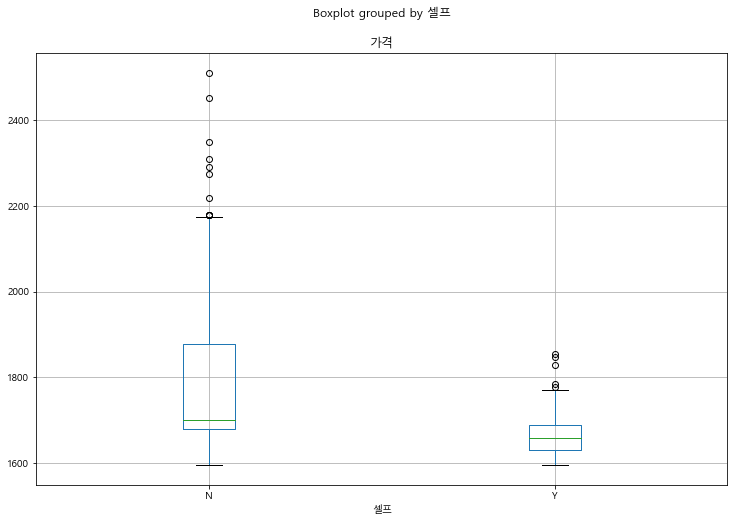

In [97]:
'''
Boxplot
- maximum / upper quartile / median / lower quartile / minimum
- 50% 포진한 박스를 IQR이라고 한다. IQR의 1.5배를 넘으면 outlier라 함
'''
#boxplot(feat. pandas)
stations.boxplot(column="가격",by="셀프",figsize=(12,8));

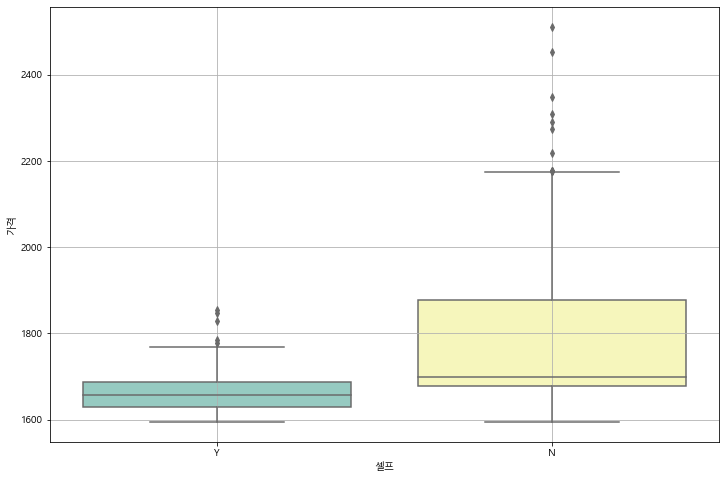

In [98]:
#boxplot (feat. seaborn)
plt.figure(figsize=(12,8))
sns.boxplot(x="셀프", y ="가격", data=stations,palette="Set3")
plt.grid(True)
plt.show()

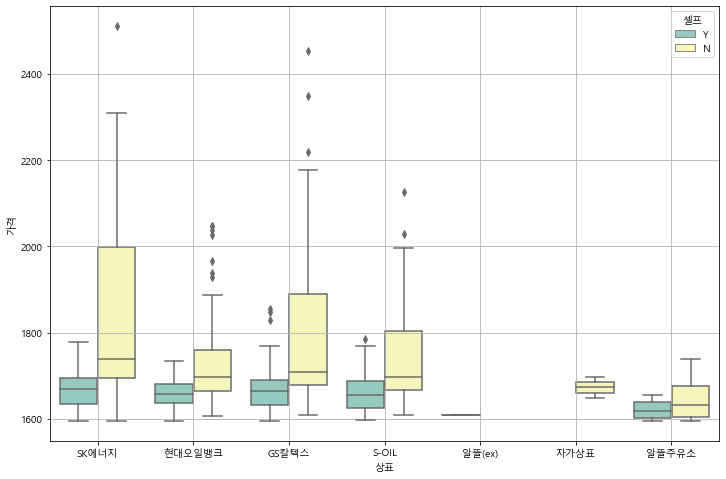

In [99]:
# boxplot(feat. seaborn)
plt.figure(figsize=(12,8))
sns.boxplot(x="상표",y="가격",hue="셀프",data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [102]:
# 지도 시각화
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [103]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
343,서남주유소,서울 중구 통일로 30,2511.0,N,SK에너지,중구
308,서계주유소,서울 용산구 청파로 367 (서계동),2453.0,N,GS칼텍스,용산구
342,필동주유소,서울 중구 퇴계로 196 (필동2가),2349.0,N,GS칼텍스,중구
341,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2310.0,N,SK에너지,중구
307,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
243,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
340,약수주유소,서울 중구 다산로 173,2218.0,N,GS칼텍스,중구
333,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2178.0,N,SK에너지,종로구
332,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2178.0,N,GS칼텍스,종로구
306,한남지점,서울 용산구 한남대로21길 4 (한남동),2178.0,N,SK에너지,용산구


In [104]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
374,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1594.0,N,알뜰주유소,강서구
244,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1594.0,N,SK에너지,양천구
373,화곡역주유소,서울 강서구 강서로 154 (화곡동),1594.0,Y,알뜰주유소,강서구
45,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
15,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1595.0,Y,GS칼텍스,노원구
14,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
245,현대주유소,서울 양천구 남부순환로 372 (신월동),1597.0,Y,S-OIL,양천구
272,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
271,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
270,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구


In [107]:
#구 별로 가격의 평균값
import numpy as np
gu_data = pd.pivot_table(data=stations, index="구",values="가격",aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1867.666667
강동구,1763.187500
강북구,1624.076923
강서구,1677.781250
관악구,1710.533333


In [114]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502,126.982], zoom_start=12, title="Stamen Toner")
my_map.choropleth(
    geo_data = geo_str,
    data=gu_data,
    columns = [gu_data.index, "가격"],
    key_on = "feature.id",
    fill_color = "PuRd"
)
my_map